In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import emcee
import corner

In [3]:
def line(x, m, b):
    return m*x + b

x = np.arange(0, 10, 0.1)
y = line(x, 2, 1)

def chisquare(xdat, ydat, func):
    chifunc = lambda args: np.sum(np.power((ydat - func(xdat, *args)) / ydat, 2)) / len(xdat)
    return chifunc

chi = chisquare(x, y, line)

def bounded(theta):
    m, b = theta
    if np.abs(m) > 10:
        return -np.inf
    if np.abs(b) > 10:
        return -np.inf
    return -0.5*chi(theta)

soln = minimize(chi, np.array([0, 0], float))

pos = soln.x + 1e-4 * np.random.randn(32, 2)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, bounded
)
N_steps = 5000
sampler.run_mcmc(pos, N_steps, progress=True);

100%|██████████| 5000/5000 [00:01<00:00, 4567.14it/s]


In [4]:
flat_samples = sampler.get_chain(discard=100, flat=True)
print((flat_samples.shape[0] +100 *nwalkers)/ N_steps)

32.0


<Figure size 640x480 with 0 Axes>

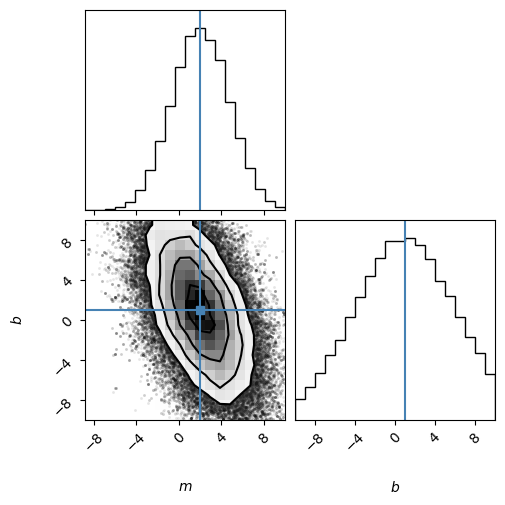

In [5]:
plt.figure()
fig = corner.corner(flat_samples, labels=["$m$", "$b$"],
                      truths=[2, 1], show_titles=False)

100%|██████████| 5000/5000 [00:01<00:00, 4247.49it/s]


<Figure size 640x480 with 0 Axes>

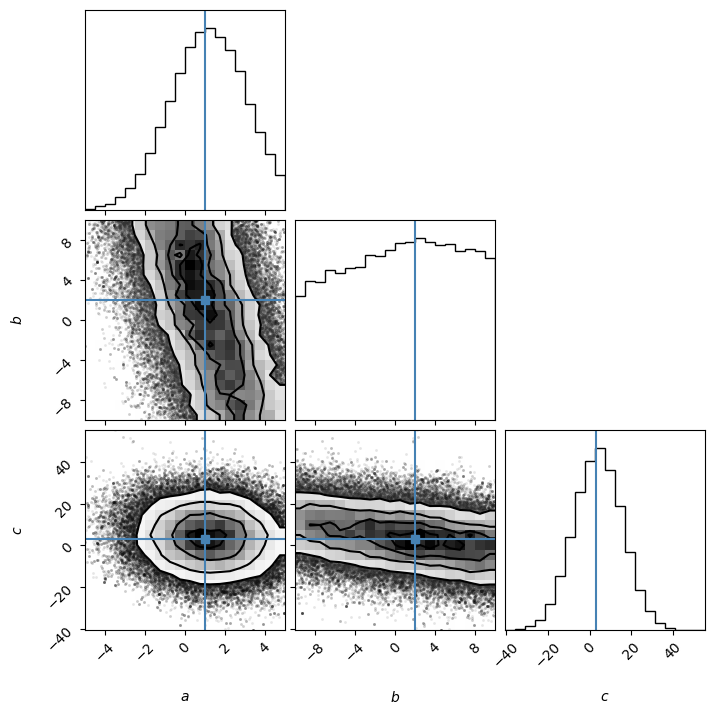

In [6]:
def poly2d(x, a, b, c):
    return a*x**2 + b*x + c

y = poly2d(x, 1, 2, 3)

chi = chisquare(x, y, poly2d)

def bounded(theta):
    a, b, c = theta
    if np.abs(a) > 5:
        return -np.inf
    if np.abs(b) > 10:
        return -np.inf
    return -0.5*chi(theta)

soln = minimize(chi, np.array([0, 0, 0], float))

pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, bounded
)
sampler.run_mcmc(pos, 5000, progress=True);

flat_samples = sampler.get_chain(discard=100, flat=True)
plt.figure()
fig = corner.corner(flat_samples, labels=["$a$", "$b$", "$c$"],
                      truths=[1, 2, 3], show_titles=False)